In [338]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## N-dimensional trajectory generation

def generate_trajectory(n_dim, n_steps=300, step_size=1e-2, epsilon=1e-4, resolution=3, seed=None):
    """
    Generate a dynamical trajectory in n-dimensional space.
    """
    # set seed
    if seed is not None:
        np.random.seed(seed)
    # generate random starting point
    x = np.ones(n_dim)
    # generate random dynamical matrix
    A = np.random.choice(np.linspace(-1, 1, resolution) + np.linspace(-1j, 1j, resolution), size=(n_dim, n_dim))

    # generate trajectory
    x_traj = np.zeros((n_steps, n_dim))
    x_traj[0, :] = x
    for i in range(1, n_steps):
        for j in range(int(step_size/epsilon)):
            x = x + (np.dot(A, x) - x**2) * epsilon
        x_traj[i, :] = np.real(x)

    # normalize trajectory
    for i in range(n_dim):
        x_traj[:,i] = (x_traj[:,i] - x_traj[:,i].min()) / (x_traj[:,i].max() - x_traj[:,i].min())

    return x_traj

def low_dimensional_projection(traj, n_dim=2):
    """
    Project a dynamical trajectory in n-dimensional space to n_dim-dimensional space.
    """
    pca = PCA(n_components=n_dim)
    pca.fit(traj)
    pca_traj = pca.transform(traj)
    score = np.sum(pca.explained_variance_ratio_)
    return pca_traj,score


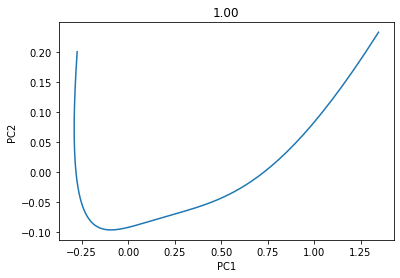

In [352]:
traj = generate_trajectory(3)
# apply PCA to trajectory
pca_traj,score = low_dimensional_projection(traj, n_dim=2)
# plot PCA trajectory
fig, ax = plt.subplots()
ax.plot(pca_traj[:, 0], pca_traj[:, 1])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("{:0.2f}".format(score))
plt.show()

In [353]:
pca = PCA(n_components=2)
pca.fit(traj)
pca_traj = pca.transform(traj)

In [354]:
pca.explained_variance_ratio_   

array([0.94885948, 0.0509926 ])

In [385]:
ndim = 3

def minfunc(x_,params):
    A = params[:ndim**2].reshape(ndim,ndim)
    B = params[ndim**2:2*ndim**2].reshape(ndim,ndim)
    C = params[2*ndim**2:2*ndim**2+ndim*2].reshape(ndim,2)
    j = params[2*ndim**2+ndim*2:].reshape(ndim,1)
    sum = 0
    for i in range(len(x_),0,-1):
        x_next = x_[i]
        x = x_[i-1]
        sum += np.sum(np.real((A+B*1j)*(np.dot(C,x)+j*1j) - (np.dot(C,x)-j*1j)**2) - np.dot(C,x_next))
    return 

# minimize the function
params = np.random.rand(2*ndim**2+ndim*2+ndim)


In [386]:
minfunc(pca_traj.T,params)

(3, 3) (3, 3) (3, 2) (3, 1)


ValueError: operands could not be broadcast together with shapes (3,3) (3,300) 